In [521]:
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
import seaborn as sns

In [466]:
load_wine = sklearn.datasets.load_wine()

In [467]:
wine_data = load_wine.data
wine_target = load_wine.target
wine_feature_names = load_wine.feature_names
wine_df = pd.DataFrame(wine_data)
wine_df.columns = wine_feature_names
wine_df['label'] = wine_target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**Data Exploration**

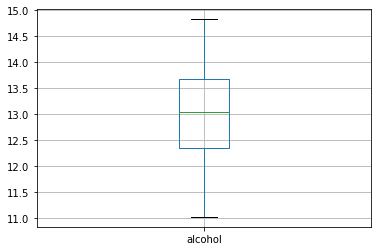

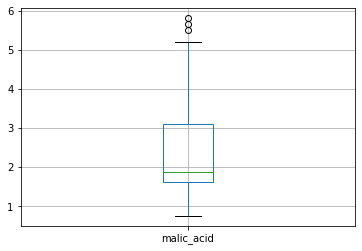

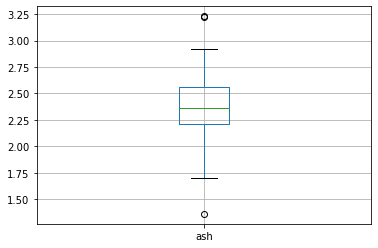

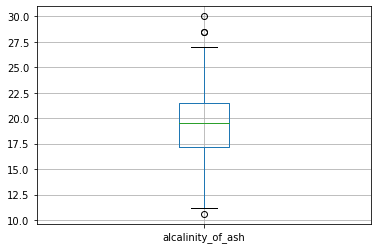

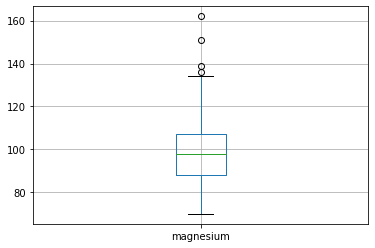

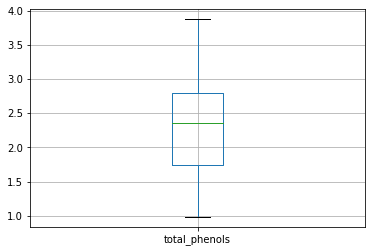

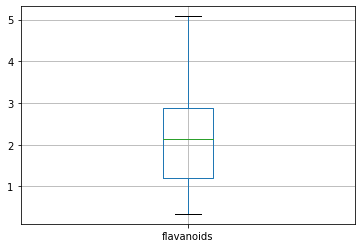

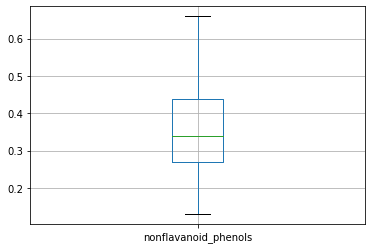

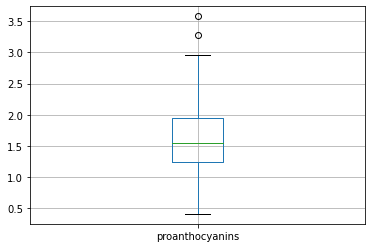

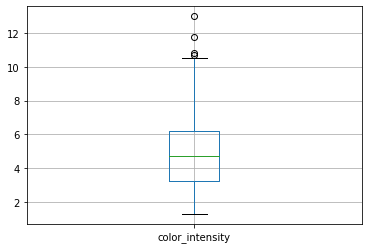

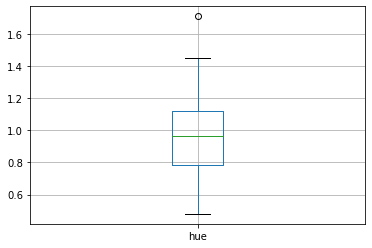

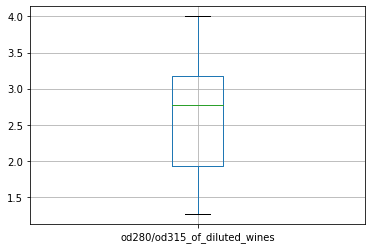

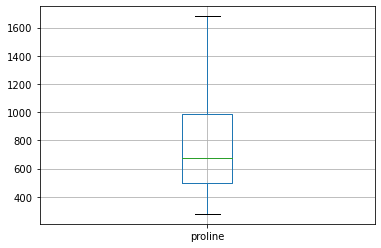

In [528]:
#Boxplot visualization of data
for i in wine_feature_names:
    a = wine_df.boxplot(column=i)
    
    plt.show()
    

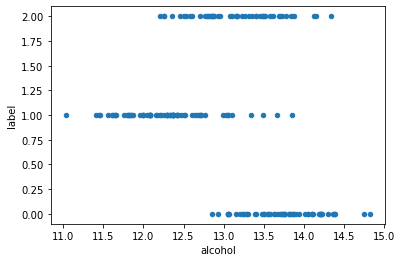

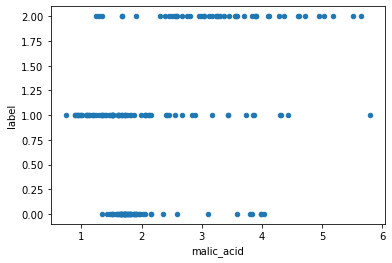

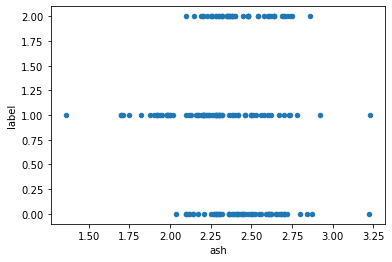

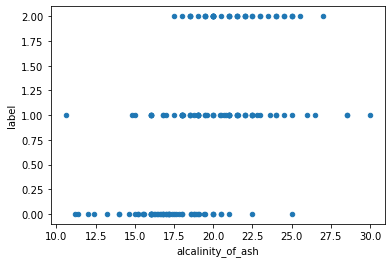

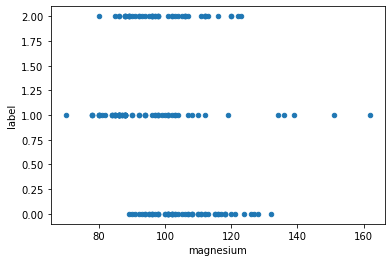

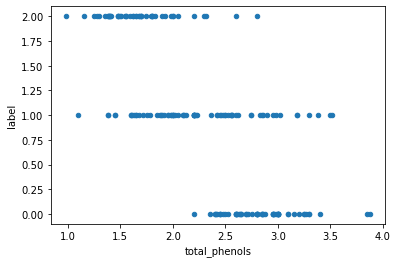

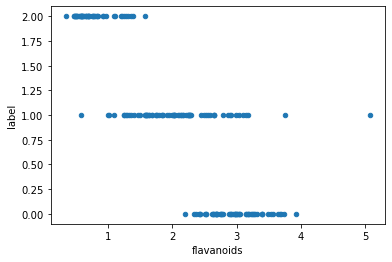

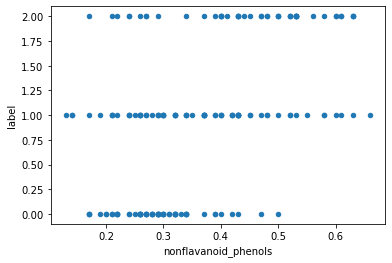

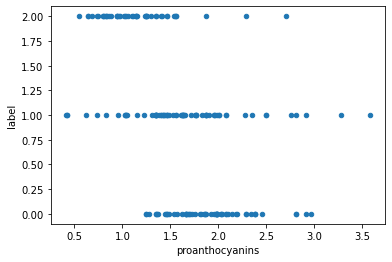

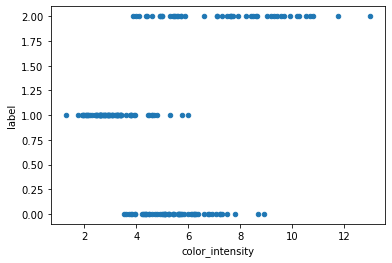

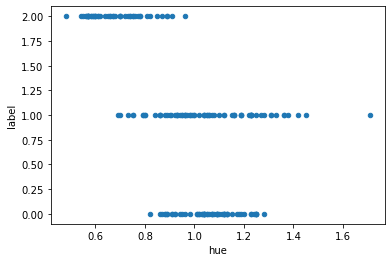

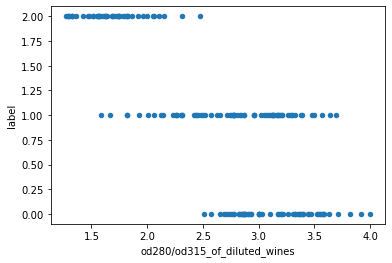

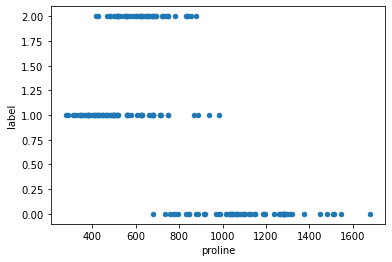

In [529]:
#Scatter plot visualization of data
for i in wine_feature_names:
    wine_df.plot.scatter(x = i, y = 'label' )
    
    plt.show()

In [472]:
wine_data_df = pd.DataFrame(wine_data)
wine_target_df = pd.DataFrame(wine_target)

In [473]:
train_x, test_x, train_y, test_y = train_test_split(wine_data_df, wine_target_df, random_state=0, test_size=0.20)

In [474]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print(type(train_y))

(142, 13) (36, 13) (142, 1) (36, 1)
<class 'pandas.core.frame.DataFrame'>


**Logistic Regression**

In [503]:
lr = LogisticRegression()
X_scaled = preprocessing.StandardScaler().fit(train_x).transform(train_x)
lr.fit(X_scaled, train_y.values.ravel())
predict_lr = lr.predict(test_x)
zero_one_loss(test_y, predict_lr)

0.6111111111111112

**Linear Discriminant Analysis**

In [495]:
lda = LDA()
lda.fit(train_x, train_y.values.ravel())
predict_lda = lda.predict(test_x)
zero_one_loss(test_y, predict_lda)

0.02777777777777779

**K-Nearest Neighbor**

In [489]:
k_range = 10
score = 0
score_list = []

for k in range(1,k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y.values.ravel())
    predict = knn.predict(test_x)
    score = zero_one_loss(test_y, predict, normalize=True)
    score_list.append(score)
    
score_list

[0.2222222222222222,
 0.25,
 0.2222222222222222,
 0.25,
 0.19444444444444442,
 0.25,
 0.2222222222222222,
 0.3055555555555556,
 0.25]